## 02_plot_anomalies.ipynb
---


This notebook imports Argo Conservative Temperature, Absolute Salinity, and the Potential Density Anomaly using post-processed in 01_gsw_tools.ipynb. Data comes from the updated **[Roemmich and Gilson (RG) Argo Climatology](http://sio-argo.ucsd.edu/RG_Climatology.html)** from the Scripps Instition of Oceanography.

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pandas as pd
from datetime import datetime
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
warnings.filterwarnings("ignore")
import matplotlib.colors as colors

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

In [2]:
# import post-processed data
data_path = '/glade/scratch/scanh/climate2020/CT_SA_sigmaT_RG09_d18_m01_y2021.nc'
ds = xr.open_mfdataset(data_path, decode_times=True)
ds

<xarray.Dataset>
Dimensions:      (LATITUDE: 145, LONGITUDE: 360, PRESSURE: 58, TIME: 204)
Coordinates:
  * TIME         (TIME) datetime64[ns] 2004-01-01 2004-02-01 ... 2020-12-01
  * PRESSURE     (PRESSURE) float32 2.5 10.0 20.0 30.0 ... 1800.0 1900.0 1975.0
  * LATITUDE     (LATITUDE) float32 -64.5 -63.5 -62.5 -61.5 ... 77.5 78.5 79.5
  * LONGITUDE    (LONGITUDE) float32 20.5 21.5 22.5 23.5 ... 377.5 378.5 379.5
Data variables:
    SA_tot       (TIME, PRESSURE, LATITUDE, LONGITUDE) float64 dask.array<chunksize=(204, 58, 145, 360), meta=np.ndarray>
    CT_tot       (TIME, PRESSURE, LATITUDE, LONGITUDE) float64 dask.array<chunksize=(204, 58, 145, 360), meta=np.ndarray>
    sigmaT_tot   (TIME, PRESSURE, LATITUDE, LONGITUDE) float64 dask.array<chunksize=(204, 58, 145, 360), meta=np.ndarray>
    SA_anom      (TIME, PRESSURE, LATITUDE, LONGITUDE) float64 dask.array<chunksize=(204, 58, 145, 360), meta=np.ndarray>
    CT_anom      (TIME, PRESSURE, LATITUDE, LONGITUDE) float64 dask.array<chunksize=(204, 58, 145, 360), meta=np.ndarray>
    sigmaT_anom  (TIME, PRESSURE, LATITUDE, LONGITUDE) float64 dask.array<chunksize=(204, 58, 145, 360), meta=np.ndarray>
    mask         (PRESSURE, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(58, 145, 360), meta=np.ndarray>

In [3]:
# Average quantities with Northeast Pacific Domain
CT_anom_box = ds.CT_anom.loc[dict(LATITUDE=slice(35.5, 51.5), LONGITUDE=slice(205.5, 224.5))].mean(('LATITUDE', 'LONGITUDE'))
SA_anom_box = ds.SA_anom.loc[dict(LATITUDE=slice(35.5, 51.5), LONGITUDE=slice(205.5, 224.5))].mean(('LATITUDE', 'LONGITUDE'))
sigmaT_anom_box = ds.sigmaT_anom.loc[dict(LATITUDE=slice(35.5, 51.5), LONGITUDE=slice(205.5, 224.5))].mean(('LATITUDE', 'LONGITUDE'))


### Code to make sidebar figure, which includes (3) Hovmoller plots and (2) maps

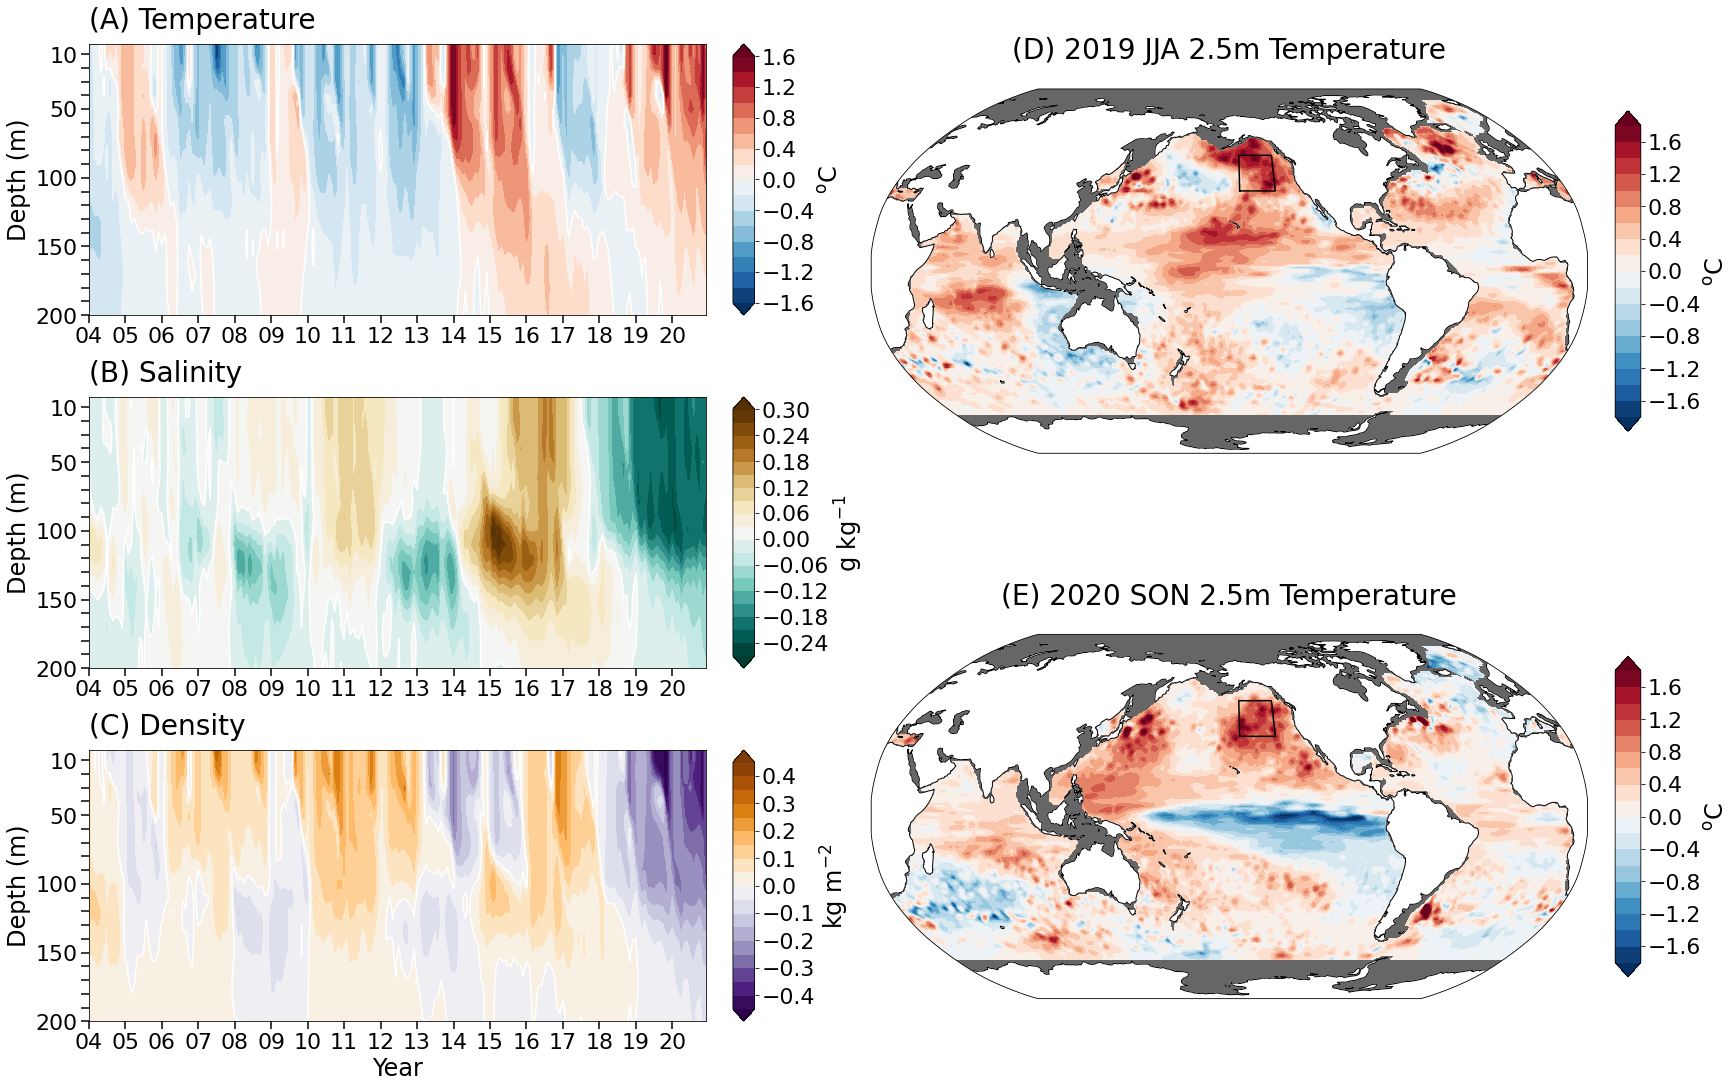

In [4]:
fig10 = plt.figure(figsize=(24,15), constrained_layout=True)
gs0 = fig10.add_gridspec(1, 2)

gs00 = gs0[0].subgridspec(3,1)
gs01 = gs0[1].subgridspec(2, 1)

# Hovmoller presets:
plt.rc('xtick', labelsize=22) 
plt.rc('ytick', labelsize=22)
date_form = DateFormatter("%y")
datelist = pd.date_range(start='1/01/2004', end='12/01/2020', freq='YS').tolist()
fs = 24
fst = 28

# Temperature Hovmoller
ax1 = fig10.add_subplot(gs00[0,0])
cont = ax1.contourf(CT_anom_box.TIME, CT_anom_box.PRESSURE, CT_anom_box.T, levels=np.arange(-1.6,1.8,.2), cmap='RdBu_r', extend='both')
cont_0 = ax1.contour(CT_anom_box.TIME, CT_anom_box.PRESSURE, CT_anom_box.T, levels=0, colors='white')
plt.ylim(2.5,200)
plt.yticks(np.arange(10,210,10), ('10','','','','50','','','','','100','','','','','150','','','','','200'))
plt.xlim(np.datetime64('2004-01-01'),np.datetime64('2020-12-01'))
plt.xticks(datelist)
plt.gca().invert_yaxis()
plt.ylabel('Depth (m)', fontsize=fs)
cbar = plt.colorbar(cont, fraction=0.02, pad=0.03)
cbar.set_label(r"$\rm^{o}C$", fontsize=fs)
plt.gca().xaxis.tick_bottom()
ax1.xaxis.set_major_formatter(date_form)
ax1.tick_params(direction='out', length=8, width=1.5, colors='k')
plt.title('(A) Temperature', loc='left', pad=15, fontsize=fst)

# Salinity Hovmoller
ax2 = fig10.add_subplot(gs00[1,0])
cont = ax2.contourf(SA_anom_box.TIME, SA_anom_box.PRESSURE, SA_anom_box.T, levels=np.arange(-.27,.30,.03), cmap='BrBG_r', extend='both')
cont_0 = ax2.contour(SA_anom_box.TIME, SA_anom_box.PRESSURE, SA_anom_box.T, levels=0, colors='white')
plt.ylim(2.5,200)
plt.yticks(np.arange(10,210,10), ('10','','','','50','','','','','100','','','','','150','','','','','200'))
plt.xlim(np.datetime64('2004-01-01'),np.datetime64('2020-12-01'))
plt.xticks(datelist)
plt.gca().invert_yaxis()
plt.ylabel('Depth (m)', fontsize=fs)
cbar = plt.colorbar(cont, fraction=0.02, pad=0.03)
cbar.set_label(r"g $\rm kg^{-1}$", fontsize=fs)
plt.gca().xaxis.tick_bottom()
ax2.xaxis.set_major_formatter(date_form)
ax2.tick_params(direction='out', length=8, width=1.5, colors='k')
plt.title('(B) Salinity', loc='left', pad=15, fontsize=fst)

# Density Hovmoller
ax3 = fig10.add_subplot(gs00[2,0])
cont = ax3.contourf(sigmaT_anom_box.TIME, sigmaT_anom_box.PRESSURE, sigmaT_anom_box.T, levels=np.arange(-.45,.5,.05), cmap='PuOr_r', extend='both')
cont_0 = ax3.contour(sigmaT_anom_box.TIME, sigmaT_anom_box.PRESSURE, sigmaT_anom_box.T, levels=0, colors='white')
plt.ylim(2.5,200)
plt.yticks(np.arange(10,210,10), ('10','','','','50','','','','','100','','','','','150','','','','','200'))
plt.xlim(np.datetime64('2004-01-01'),np.datetime64('2020-12-01'))
plt.xticks(datelist)
plt.gca().invert_yaxis()
plt.ylabel('Depth (m)', fontsize=fs)
cbar = plt.colorbar(cont, fraction=0.02, pad=0.03)
cbar.set_label(r"kg $\rm m^{-2}$", fontsize=fs)
plt.gca().xaxis.tick_bottom()
ax3.xaxis.set_major_formatter(date_form)
plt.xlabel('Year', fontsize=fs)
ax3.tick_params(direction='out', length=8, width=1.5, colors='k')
plt.title('(C) Density', loc='left', pad=15, fontsize=fst)

# JJA 2019 map of surface temperature 
ax4 = fig10.add_subplot(gs01[0,0], projection=ccrs.Robinson(central_longitude=200))
cont2 = ax4.contourf(ds.LONGITUDE-360, 
                    ds.LATITUDE, 
                    ds.CT_anom[:,0,:,:].loc[dict(TIME=slice('2019-06-01','2019-08-01'))].mean('TIME'),
                    cmap=plt.get_cmap('RdBu_r'), 
                    extend='both', 
                    levels=np.arange(-1.8,2,.2), 
                    vmin=-1.8, 
                    vmax=1.8,
                    transform=ccrs.PlateCarree()) 
cbar = plt.colorbar(cont2, fraction=0.02, pad=0.03, shrink=0.6)
cbar.set_label(r"$\rm ^{o}C$", fontsize=fs)
plt.gca().patch.set_color('.40')
ax4.add_feature(cfeature.LAND, facecolor='white', zorder=1) # '#d3d3d3'
ax4.coastlines(linewidth=1,zorder=2)
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax4.xaxis.set_major_formatter(lon_formatter)
ax4.yaxis.set_major_formatter(lat_formatter)
ax4.set_extent([20.5, 379.5, -90, 90], crs=ccrs.PlateCarree())
plt.title('(D) 2019 JJA 2.5m Temperature', loc='center', pad=30, fontsize=fst)
plt.plot([-154.5,-135.5,-135.5,-154.5,-154.5], [35.5,35.5,51.5,51.5,35.5],'k',transform=ccrs.PlateCarree());

# SON 2020 map of surface temperature
ax5 = fig10.add_subplot(gs01[1,0], projection=ccrs.Robinson(central_longitude=200))
cont = ax5.contourf(ds.LONGITUDE-360, 
                    ds.LATITUDE, 
                    ds.CT_anom[:,0,:,:].loc[dict(TIME=slice('2020-09-01','2020-11-01'))].mean('TIME'),
                    cmap=plt.get_cmap('RdBu_r'), 
                    extend='both', 
                    levels=np.arange(-1.8,2,.2), 
                    vmin=-1.8, 
                    vmax=1.8,
                    transform=ccrs.PlateCarree()) 
cbar = plt.colorbar(cont, fraction=0.02, pad=0.03, shrink=0.6)
cbar.set_label(r"$\rm ^{o}C$", fontsize=fs)
plt.gca().patch.set_color('.40')
ax5.add_feature(cfeature.LAND, facecolor='white', zorder=1) # '#d3d3d3'
ax5.coastlines(linewidth=1,zorder=2)
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax5.xaxis.set_major_formatter(lon_formatter)
ax5.yaxis.set_major_formatter(lat_formatter)
ax5.set_extent([20.5, 379.5, -90, 90], crs=ccrs.PlateCarree())
plt.title('(E) 2020 SON 2.5m Temperature', loc='center', pad=30, fontsize=fst)
plt.plot([-154.5,-135.5,-135.5,-154.5,-154.5], [35.5,35.5,51.5,51.5,35.5],'k',transform=ccrs.PlateCarree())


plt.savefig('/glade/u/home/scanh/mhw-2020/figures/figure1_2004_2020.png', dpi=300)


### A slight modification of the figure showing 2019-2020 only

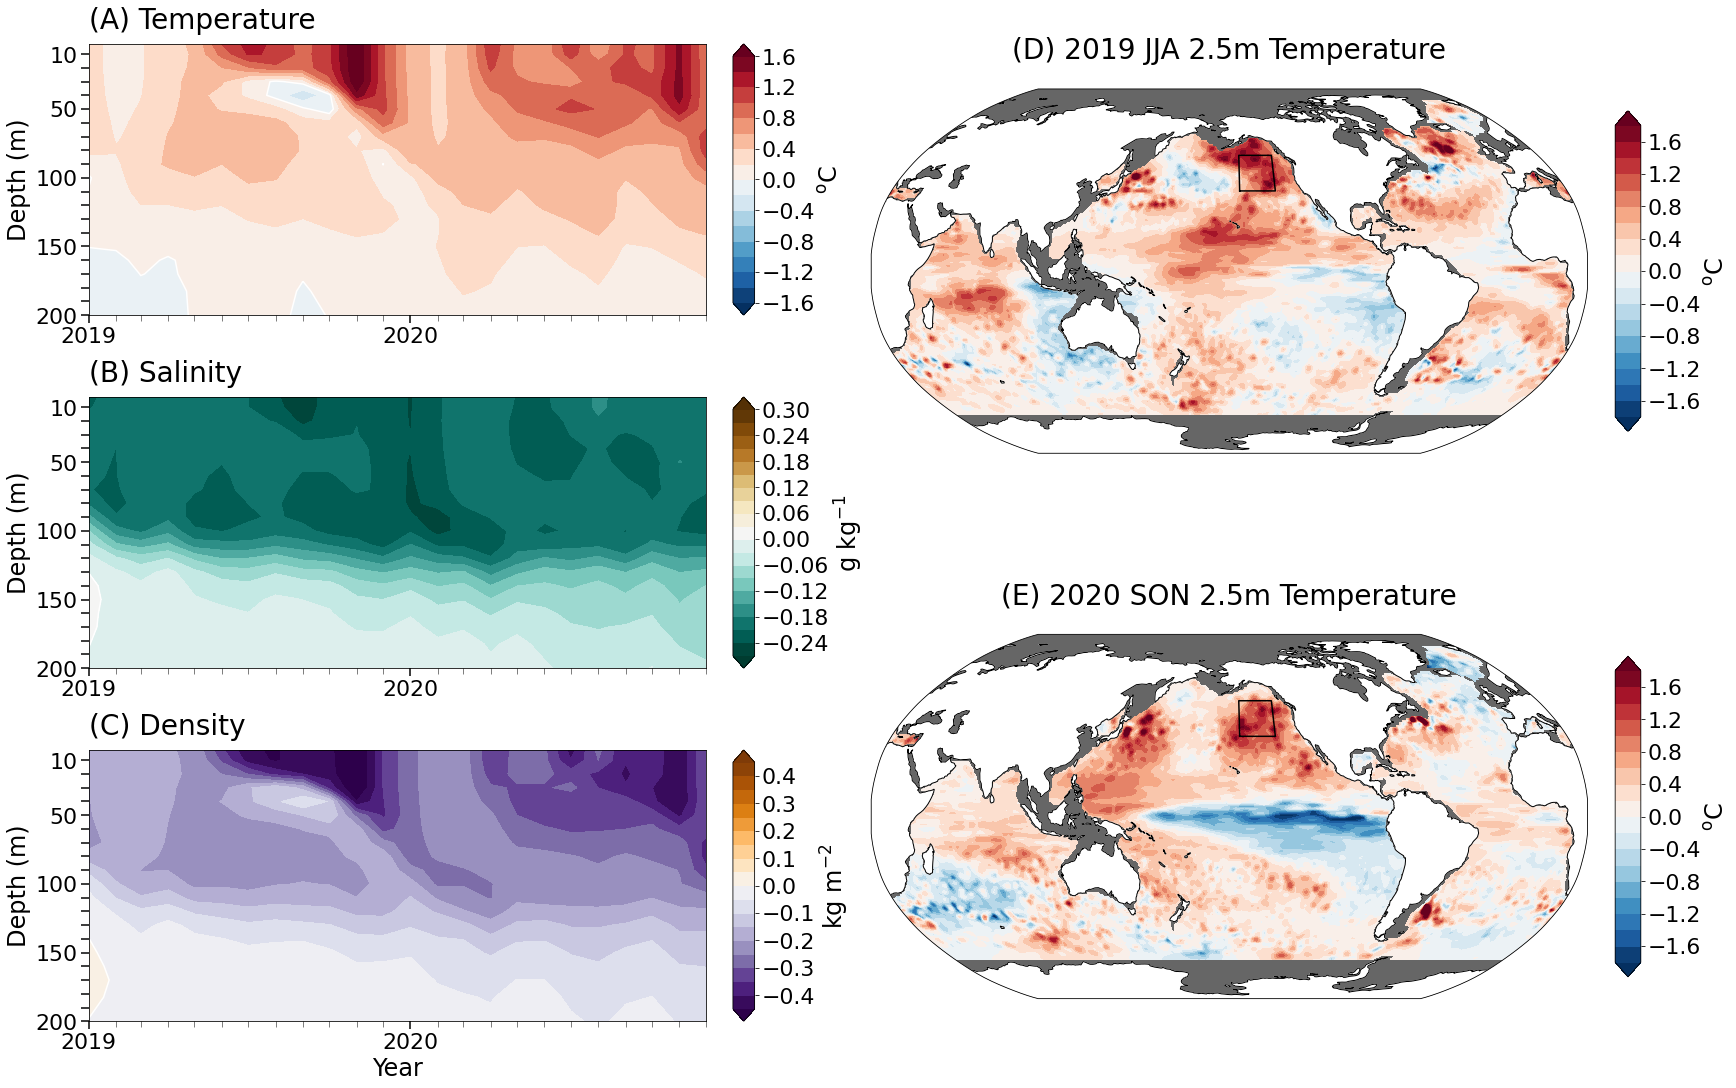

In [5]:
fig10 = plt.figure(figsize=(24,15), constrained_layout=True)
gs0 = fig10.add_gridspec(1, 2)

gs00 = gs0[0].subgridspec(3,1)
gs01 = gs0[1].subgridspec(2, 1)

# Hovmoller presets:
plt.rc('xtick', labelsize=22) 
plt.rc('ytick', labelsize=22)
date_form = DateFormatter("%m")

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

fs = 24
fst = 28

# Temperature Hovmoller
ax1 = fig10.add_subplot(gs00[0,0])
cont = ax1.contourf(CT_anom_box.TIME, CT_anom_box.PRESSURE, CT_anom_box.T, levels=np.arange(-1.6,1.8,.2), cmap='RdBu_r', extend='both')
cont_0 = ax1.contour(CT_anom_box.TIME, CT_anom_box.PRESSURE, CT_anom_box.T, levels=0, colors='white')
plt.ylim(2.5,200)
plt.yticks(np.arange(10,210,10), ('10','','','','50','','','','','100','','','','','150','','','','','200'))
plt.xlim(np.datetime64('2019-01-01'),np.datetime64('2020-12-01'))
plt.gca().invert_yaxis()
plt.ylabel('Depth (m)', fontsize=fs)
cbar = plt.colorbar(cont, fraction=0.02, pad=0.03)
cbar.set_label(r"$\rm^{o}C$", fontsize=fs)
plt.gca().xaxis.tick_bottom()
# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
ax1.tick_params(direction='out', length=8, width=1.5, colors='k')
ax1.tick_params(which='minor', length=6, width=.5)

plt.title('(A) Temperature', loc='left', pad=15, fontsize=fst)

# Salinity Hovmoller
ax2 = fig10.add_subplot(gs00[1,0])
cont = ax2.contourf(SA_anom_box.TIME, SA_anom_box.PRESSURE, SA_anom_box.T, levels=np.arange(-.27,.30,.03), cmap='BrBG_r', extend='both')
cont_0 = ax2.contour(SA_anom_box.TIME, SA_anom_box.PRESSURE, SA_anom_box.T, levels=0, colors='white')
plt.ylim(2.5,200)
plt.yticks(np.arange(10,210,10), ('10','','','','50','','','','','100','','','','','150','','','','','200'))
plt.xlim(np.datetime64('2019-01-01'),np.datetime64('2020-12-01'))
plt.gca().invert_yaxis()
plt.ylabel('Depth (m)', fontsize=fs)
cbar = plt.colorbar(cont, fraction=0.02, pad=0.03)
cbar.set_label(r"g $\rm kg^{-1}$", fontsize=fs)
plt.gca().xaxis.tick_bottom()
# format the ticks
ax2.xaxis.set_major_locator(years)
ax2.xaxis.set_major_formatter(years_fmt)
ax2.xaxis.set_minor_locator(months)
ax2.tick_params(direction='out', length=8, width=1.5, colors='k')
ax2.tick_params(which='minor', length=6, width=.5)
plt.title('(B) Salinity', loc='left', pad=15, fontsize=fst)

# Density Hovmoller
ax3 = fig10.add_subplot(gs00[2,0])
cont = ax3.contourf(sigmaT_anom_box.TIME, sigmaT_anom_box.PRESSURE, sigmaT_anom_box.T, levels=np.arange(-.45,.5,.05), cmap='PuOr_r', extend='both')
cont_0 = ax3.contour(sigmaT_anom_box.TIME, sigmaT_anom_box.PRESSURE, sigmaT_anom_box.T, levels=0, colors='white')
plt.ylim(2.5,200)
plt.yticks(np.arange(10,210,10), ('10','','','','50','','','','','100','','','','','150','','','','','200'))
plt.xlim(np.datetime64('2019-01-01'),np.datetime64('2020-12-01'))
plt.gca().invert_yaxis()
plt.ylabel('Depth (m)', fontsize=fs)
cbar = plt.colorbar(cont, fraction=0.02, pad=0.03)
cbar.set_label(r"kg $\rm m^{-2}$", fontsize=fs)
plt.gca().xaxis.tick_bottom()
# format the ticks
ax3.xaxis.set_major_locator(years)
ax3.xaxis.set_major_formatter(years_fmt)
ax3.xaxis.set_minor_locator(months)
plt.xlabel('Year', fontsize=fs)
ax3.tick_params(direction='out', length=8, width=1.5, colors='k')
ax3.tick_params(which='minor', length=6, width=.5)

plt.title('(C) Density', loc='left', pad=15, fontsize=fst)


# JJA 2019 map of surface temperature 
ax4 = fig10.add_subplot(gs01[0,0], projection=ccrs.Robinson(central_longitude=200))
cont2 = ax4.contourf(ds.LONGITUDE-360, 
                    ds.LATITUDE, 
                    ds.CT_anom[:,0,:,:].loc[dict(TIME=slice('2019-06-01','2019-08-01'))].mean('TIME'),
                    cmap=plt.get_cmap('RdBu_r'), 
                    extend='both', 
                    levels=np.arange(-1.8,2,.2), 
                    vmin=-1.8, 
                    vmax=1.8,
                    transform=ccrs.PlateCarree()) 
cbar = plt.colorbar(cont2, fraction=0.02, pad=0.03, shrink=0.6)
cbar.set_label(r"$\rm ^{o}C$", fontsize=fs)
plt.gca().patch.set_color('.40')
ax4.add_feature(cfeature.LAND, facecolor='white', zorder=1) # '#d3d3d3'
ax4.coastlines(linewidth=1,zorder=2)
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax4.xaxis.set_major_formatter(lon_formatter)
ax4.yaxis.set_major_formatter(lat_formatter)
ax4.set_extent([20.5, 379.5, -90, 90], crs=ccrs.PlateCarree())
plt.title('(D) 2019 JJA 2.5m Temperature', loc='center', pad=30, fontsize=fst)
plt.plot([-154.5,-135.5,-135.5,-154.5,-154.5], [35.5,35.5,51.5,51.5,35.5],'k',transform=ccrs.PlateCarree());

# SON 2020 map of surface temperature
ax5 = fig10.add_subplot(gs01[1,0], projection=ccrs.Robinson(central_longitude=200))
cont = ax5.contourf(ds.LONGITUDE-360, 
                    ds.LATITUDE, 
                    ds.CT_anom[:,0,:,:].loc[dict(TIME=slice('2020-09-01','2020-11-01'))].mean('TIME'),
                    cmap=plt.get_cmap('RdBu_r'), 
                    extend='both', 
                    levels=np.arange(-1.8,2,.2), 
                    vmin=-1.8, 
                    vmax=1.8,
                    transform=ccrs.PlateCarree()) 
cbar = plt.colorbar(cont, fraction=0.02, pad=0.03, shrink=0.6)
cbar.set_label(r"$\rm ^{o}C$", fontsize=fs)
plt.gca().patch.set_color('.40')
ax5.add_feature(cfeature.LAND, facecolor='white', zorder=1) # '#d3d3d3'
ax5.coastlines(linewidth=1,zorder=2)
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax5.xaxis.set_major_formatter(lon_formatter)
ax5.yaxis.set_major_formatter(lat_formatter)
ax5.set_extent([20.5, 379.5, -90, 90], crs=ccrs.PlateCarree())
plt.title('(E) 2020 SON 2.5m Temperature', loc='center', pad=30, fontsize=fst)
plt.plot([-154.5,-135.5,-135.5,-154.5,-154.5], [35.5,35.5,51.5,51.5,35.5],'k',transform=ccrs.PlateCarree())

plt.savefig('/glade/u/home/scanh/mhw-2020/figures/figure1_2019_2020.png', dpi=300)
